# Lead Scoring Case Study

### Step1: Importing libraries and data

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
#Reading the data
lead_df = pd.read_csv('Leads.csv')

In [4]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_df.shape

(9240, 37)

### Step 2: Data Understanding and Interpretation

In [6]:
# check statistics for numerical columns
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# check whether there are any duplicates
lead_df.duplicated().sum()

0

In [8]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Observation
1. A large number of columns have null values.
2. Prospect ID and Lead Number both serve the same purpose. They are both unique identifiers. 
3. Few categorical columns have "Select" in their entries. Those select are essentially null values because Select appears when    someone does not select anything from the dropdown

## Step 3: Data Cleaning

### 3.1 Treatment for 'Select' values
As stated in the problem description, several categorical variables contain a level labeled 'Select,' which requires special handling since it effectively represents a missing or null value. This likely occurs when a customer didn't choose any option from the list, resulting in the default 'Select' value for those columns.

In [9]:
#Replacing select with NaN
lead_df = lead_df.replace('Select', np.nan)

### 3.2 Handling Missing Values

In [10]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [11]:
#dropping columns with more than 40% missing/null values
lead_df.drop(columns=lead_df.columns[round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2) >= 40], inplace=True)

In [12]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [13]:
lead_df.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

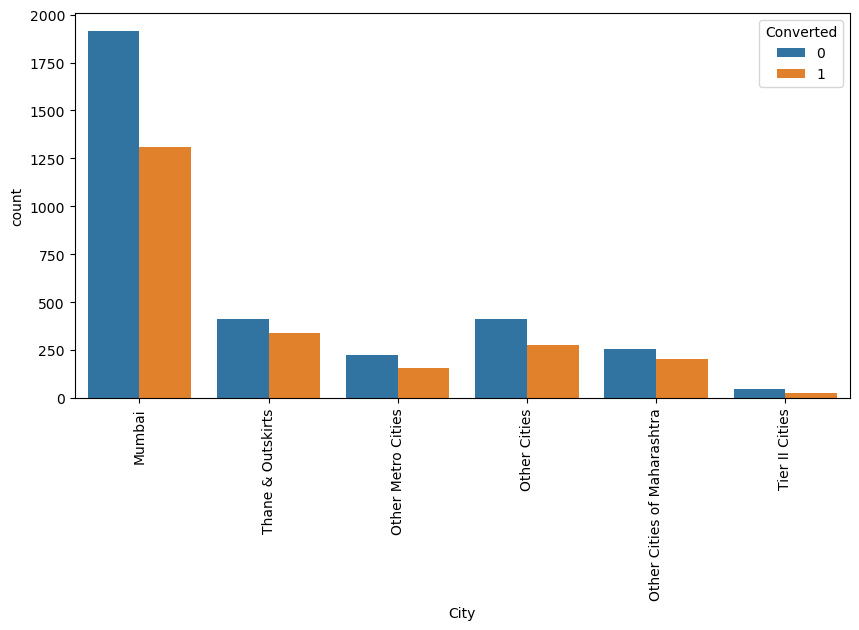

In [14]:
plt.figure(figsize=(10,5))
s1 = sns.countplot(x='City', hue='Converted', data=lead_df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

City has 39.71 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence City column can be dropped.

In [15]:
lead_df.drop(['City'],axis=1,inplace=True)

In [16]:
lead_df.Specialization.value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called Not Specified.

In [17]:
lead_df['Specialization'] = lead_df.Specialization.replace(np.nan, 'Not Specified')

In [18]:
lead_df.Specialization.value_counts(dropna = False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
# categorize all management courses
lead_df.loc[(lead_df.Specialization == 'Finance Management') | 
            (lead_df.Specialization == 'Human Resource Management') | 
            (lead_df.Specialization == 'Marketing Management') |  
            (lead_df.Specialization == 'Operations Management') |
            (lead_df.Specialization == 'IT Projects Management') | 
            (lead_df.Specialization == 'Supply Chain Management') |
            (lead_df.Specialization == 'Healthcare Management') | 
            (lead_df.Specialization == 'Hospitality Management') |
            (lead_df.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

# categorize all busines courses
lead_df.loc[(lead_df.Specialization == 'Business Administration') | 
            (lead_df.Specialization == 'International Business') | 
            (lead_df.Specialization == 'Rural and Agribusiness') | 
            (lead_df.Specialization == 'E-Business') , 'Specialization'] = 'Business Specializations'

# categorize all industry courses
lead_df.loc[(lead_df.Specialization == 'Banking, Investment And Insurance') | 
            (lead_df.Specialization == 'Media and Advertising') |
            (lead_df.Specialization == 'Travel and Tourism') | 
            (lead_df.Specialization == 'Services Excellence') |
            (lead_df.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

In [20]:
lead_df.Specialization.value_counts(dropna = False)

Management Specializations    4253
Not Specified                 3380
Industry Specializations       896
Business Specializations       711
Name: Specialization, dtype: int64

In [21]:
lead_df.Tags.value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence it can be dropped.

In [22]:
lead_df.drop(['Tags'],axis=1,inplace=True)

In [23]:
lead_df['What matters most to you in choosing a course'].value_counts(dropna= False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight. Hence dropping it.

In [24]:
lead_df.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [25]:
lead_df['What is your current occupation'].value_counts(dropna= False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

The missing values in this column could be imputed with 'Unemployed' as it has the most values. From a business perspective, this variable holds significance, given that X Education specializes in online courses, and individuals without current employment may be inclined to enroll in such courses to enhance their employability prospects.

In [26]:
# combine low representing categories
lead_df.loc[(lead_df['What is your current occupation'] == 'Student') | 
            (lead_df['What is your current occupation'] == 'Other') | 
            (lead_df['What is your current occupation'] == 'Housewife') | 
            (lead_df['What is your current occupation'] == 'Businessman') , "What is your current occupation"] = 'Student and Others'


In [27]:
#replace NaN with Unemployed
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [28]:
lead_df['What is your current occupation'].value_counts(dropna= False)

Unemployed              8290
Working Professional     706
Student and Others       244
Name: What is your current occupation, dtype: int64

In [29]:
lead_df['Country'].value_counts(dropna= False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

 X Education sells online courses and appx 96% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence `Country column can be dropped.

In [30]:
lead_df.drop(['Country'], axis = 1, inplace = True)

In [31]:
lead_df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

"Email Opened" is having highest number of values and overall missing values in this column is 1.11%, hence imputing the missing values with label 'Email Opened'.

In [32]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan, 'Email Opened')

In [33]:
lead_df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

"Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence imputing the missing values with label 'Google'

In [34]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan, 'Google')

In [35]:
lead_df.TotalVisits.value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

Missing values in 'TotalVisits' can be imputed with mode.

In [36]:
lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].mode()[0], inplace=True)

In [37]:
lead_df['Page Views Per Visit'].value_counts(dropna = False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

Missing values in 'Page Views Per Visit' can be imputed with mode.

In [38]:
lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].mode()[0], inplace=True)

In [39]:
##Checking the missing values again
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending = False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

Handling columns with only one unique value

In [40]:
#check for columns with one unique value, count and freq is same

lead_df.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,...,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,4,3,2,1,...,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Management Specializations,Unemployed,No,No,...,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,4253,8290,9226,9240,...,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


Following columns have only one unique value:

- 'I agree to pay the amount through cheque'
- 'Get updates on DM Content'
- 'Update me on Supply Chain Content'
- 'Receive More Updates About Our Courses'
- 'Magazine'

These columns are of no use as they have only one category of response from customer and can be dropped:

In [41]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

lead_df.drop(cols_to_drop, axis = 1, inplace = True)

- 'Prospect ID',
- 'Lead Number',
- 'Last Notable Activity'
Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [42]:
lead_df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

### 3.3 Checking & Dropping Category Columns that are Skewed¶

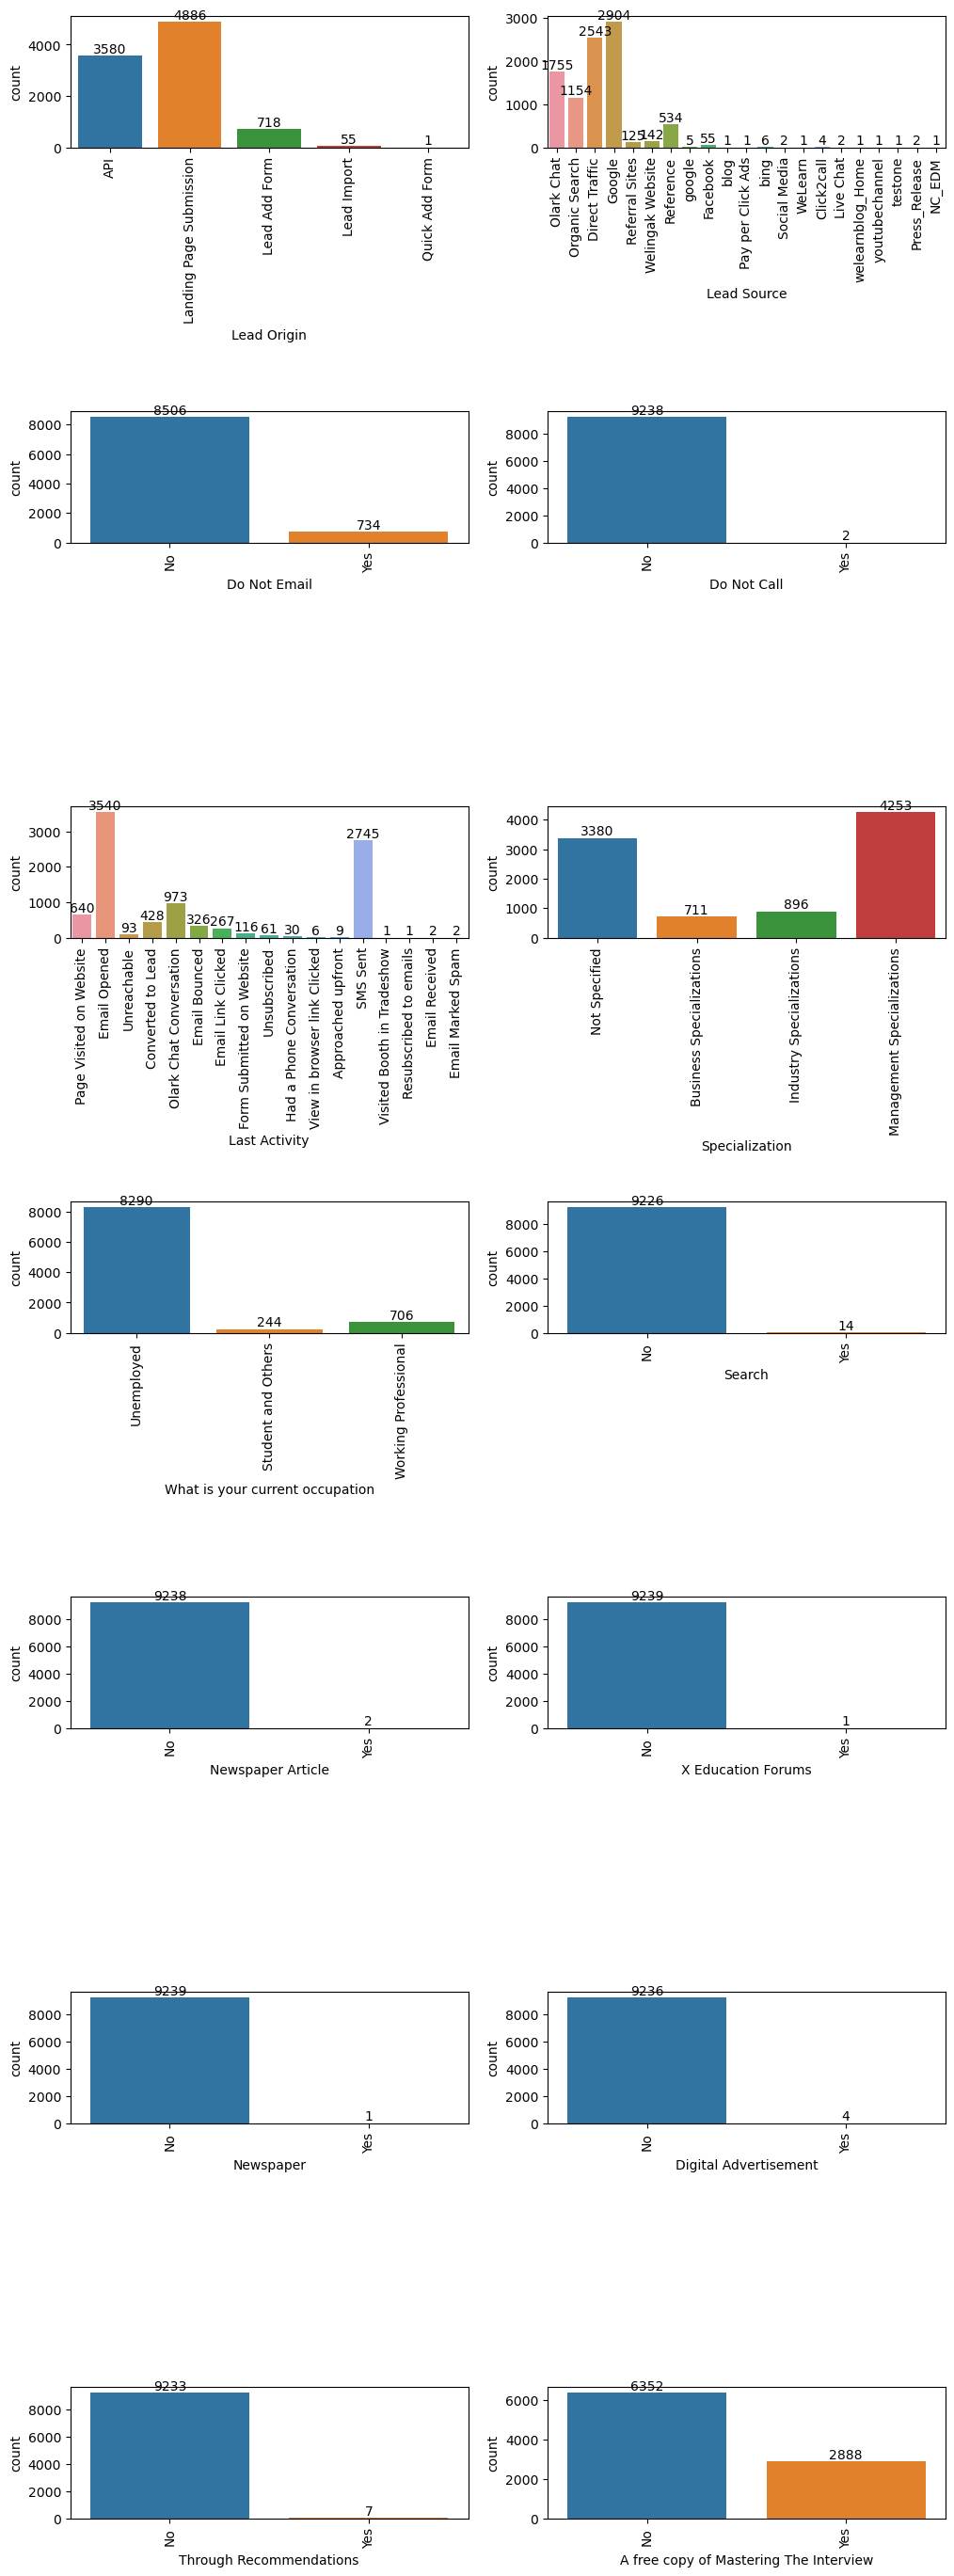

In [43]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = lead_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=lead_df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

Following columns have data which is highly skewed :

'Do Not Call',
'Search',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations'.
Hence these columns can be dropped as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can lead to biased or inaccurate parameter estimates.

In [44]:
# Dropping categorical columns with highly skewed data
lead_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

### 3.4 Outlier Analysis

In [45]:
#For numerical columns
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

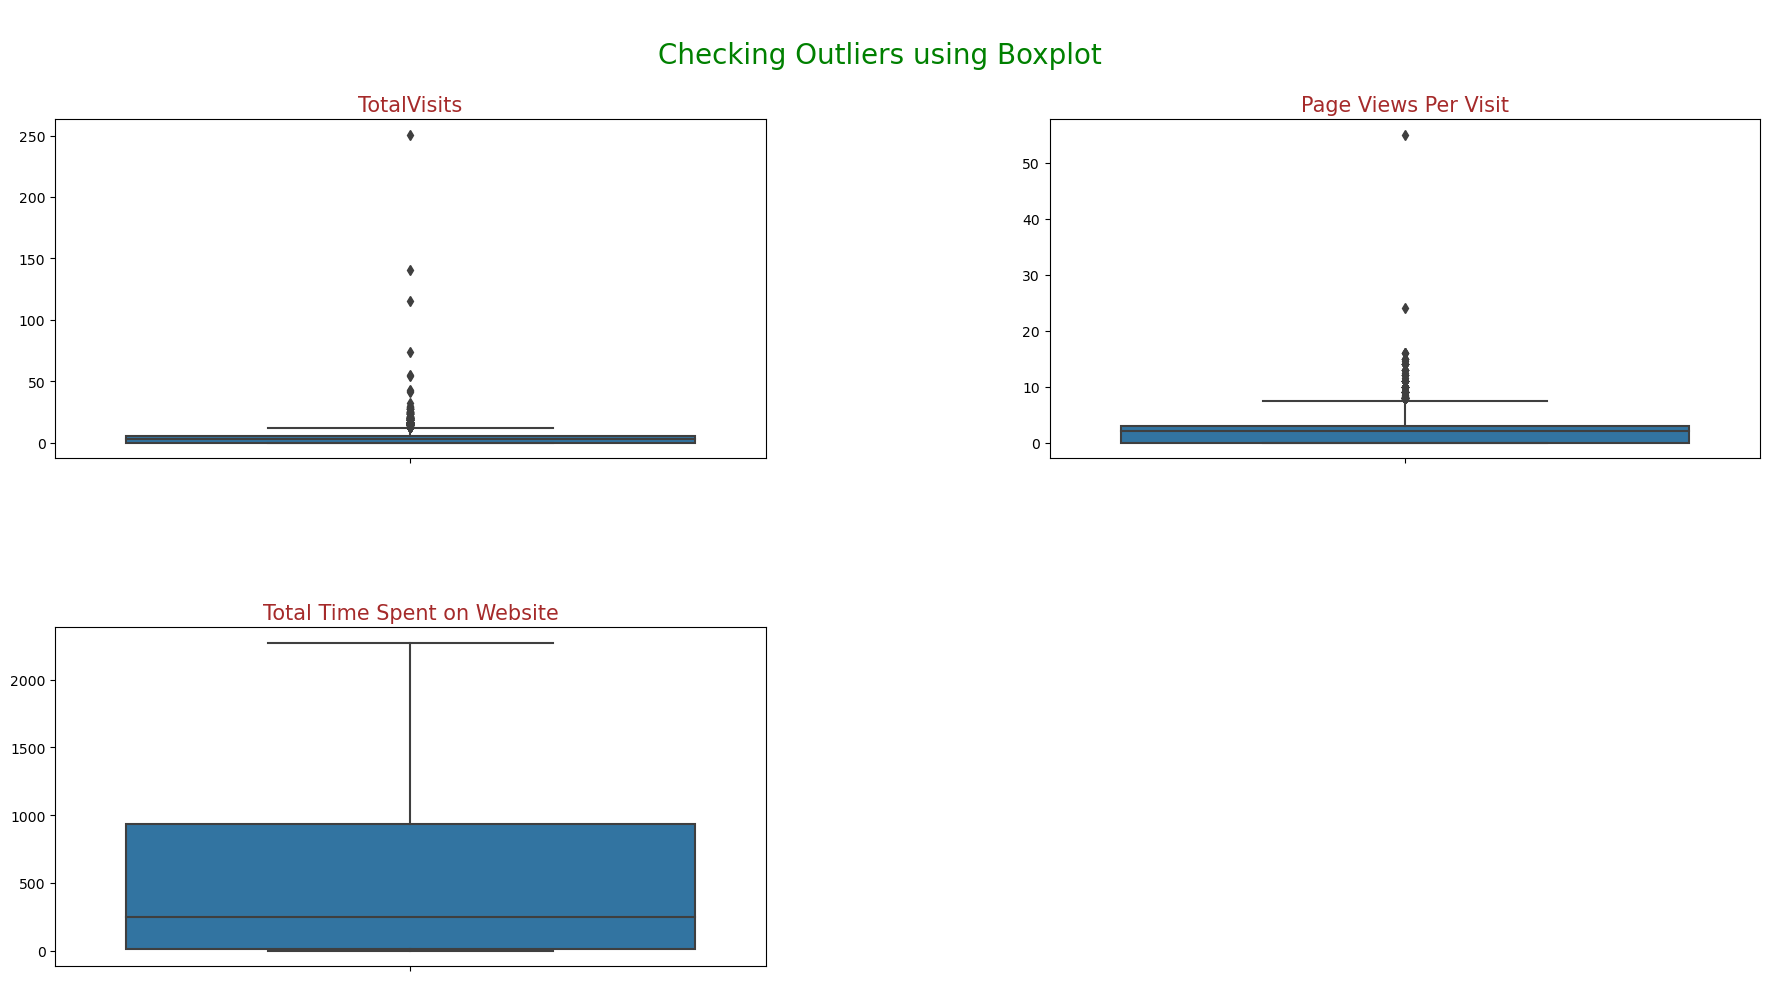

In [46]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(lead_df,num_cols)

"TotalVisits" and "Page Views Per Visit" both contain outliers, evident in the boxplot. Therefore, it is necessary to address and treat these outliers in these variables.

In [47]:
# before outlier treatment
lead_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [48]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        
        

In [49]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(lead_df,capping_cols)

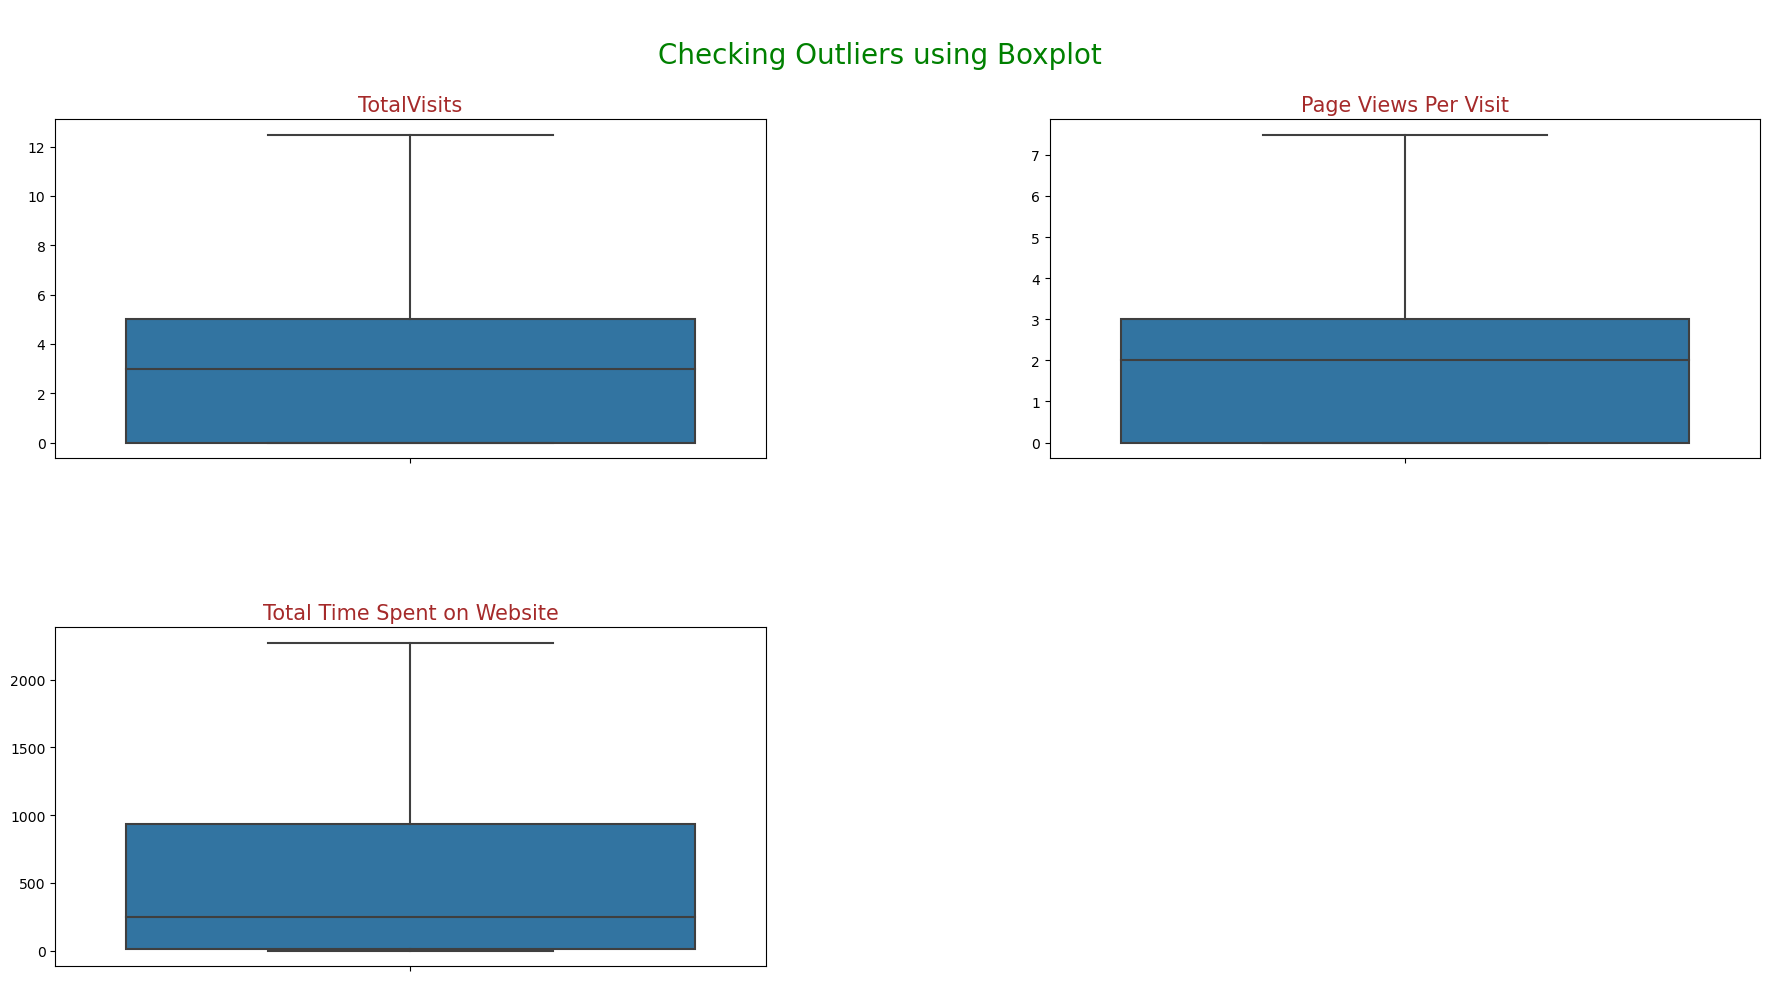

In [50]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(lead_df,num_cols)

In [51]:
# after outlier treatment
lead_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


### 3.6 Fixing Invalid values & Standardising Data in columns

- Checking if entries in data are in correct format or not , casing styles (UPPER,lower)
- Checking data types of columns

In [52]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*lead_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_^_"*40,"\n")


value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.0108

- We've noticed that some categories/levels in the "Lead Score" and "Last Activity" columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we're planning to group these categories together under "Others". That way, we can keep things neat and tidy.

- Also we can see "Google" & "google" are same in "Lead Source", so we will standardise the case.

In [53]:
# Grouping low frequency value levels to Others
lead_df['Lead Source'] = lead_df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
lead_df['Lead Source'] = lead_df['Lead Source'].replace("google","Google")

In [54]:
# value_counts percentage after replace
lead_df["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [55]:
# Grouping low frequency value levels to Others 
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [56]:
# value_counts percentage after replace
lead_df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [57]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
lead_df.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
lead_df.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)


"Do Not Email" & "Free_copy" both are binary categorical columns, mapping both of them yes/no to 1/0

In [58]:
lead_df['Do Not Email'] = lead_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

lead_df['Free_copy'] = lead_df['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

#### 3.6.1 Checking Data-types of variables

In [59]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


The data types appear to be suitable and no modifications are necessary.

## Step 4: Data Analysis (EDA)

### 4.1 Checking if Data is Imbalanced or not
Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset
Data imbalance is in the context of Target variable only
Target variable is 'Converted' which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted

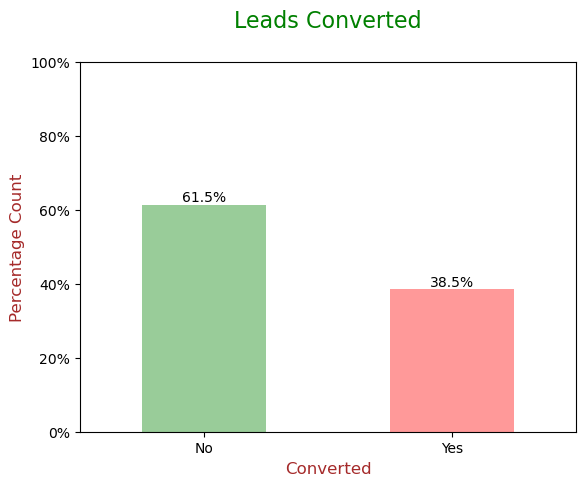

In [60]:
## ploting the results on bar plot

ax=(100*lead_df["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()


#### Insights:

Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads.(Minority)
While 61.5% of the people didnt convert to leads. (Majority)

In [61]:
### Ratio of Data Imbalance
ratio=(lead_df["Converted"].value_counts(normalize=True).loc[0])/(lead_df["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


### 4.2 Univariate Analysis

In [62]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Specializations,Student and Others,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Industry Specializations,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0


In [63]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

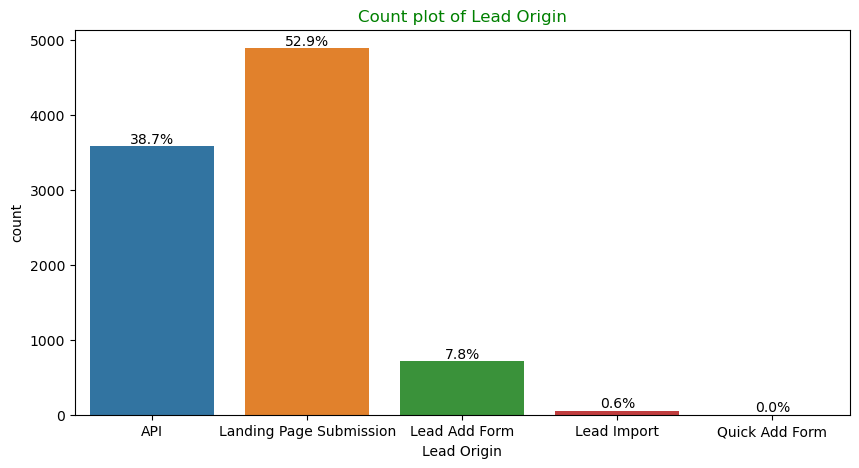

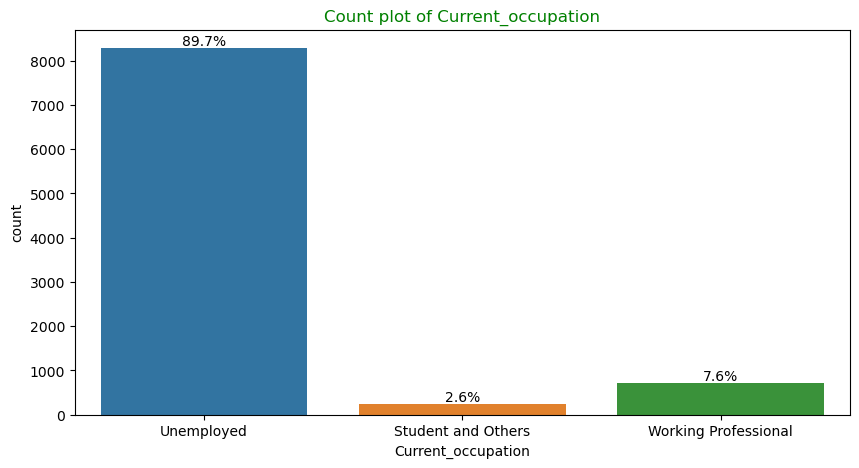

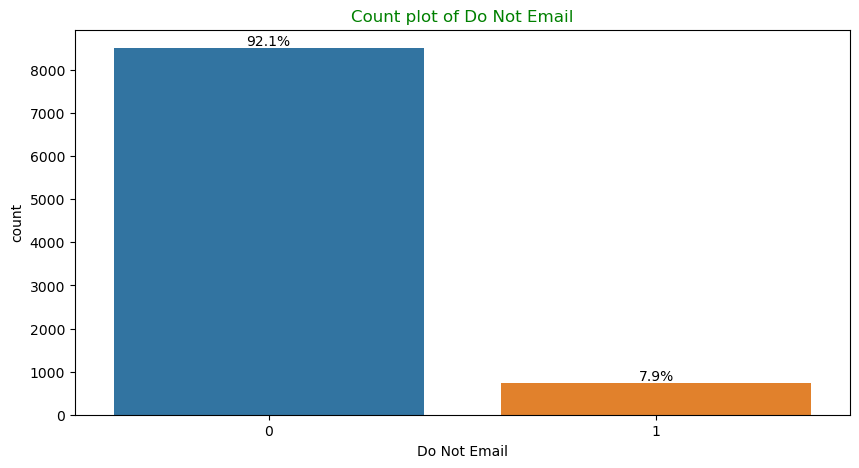

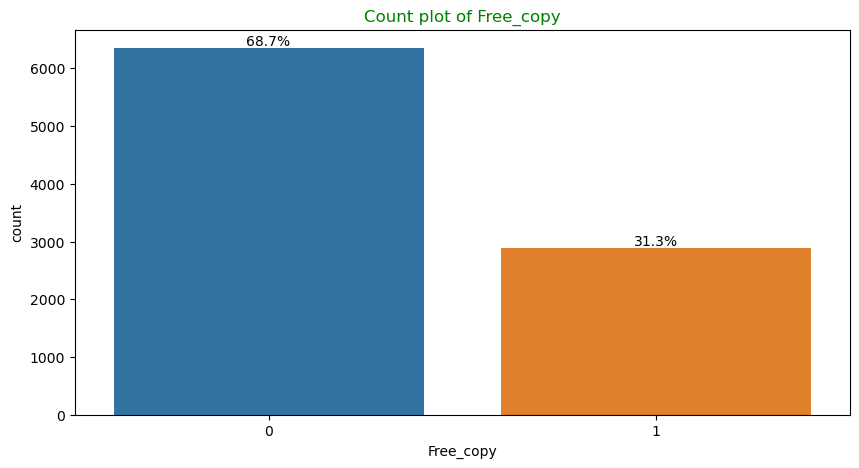

In [64]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=lead_df)
    total=len(lead_df[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

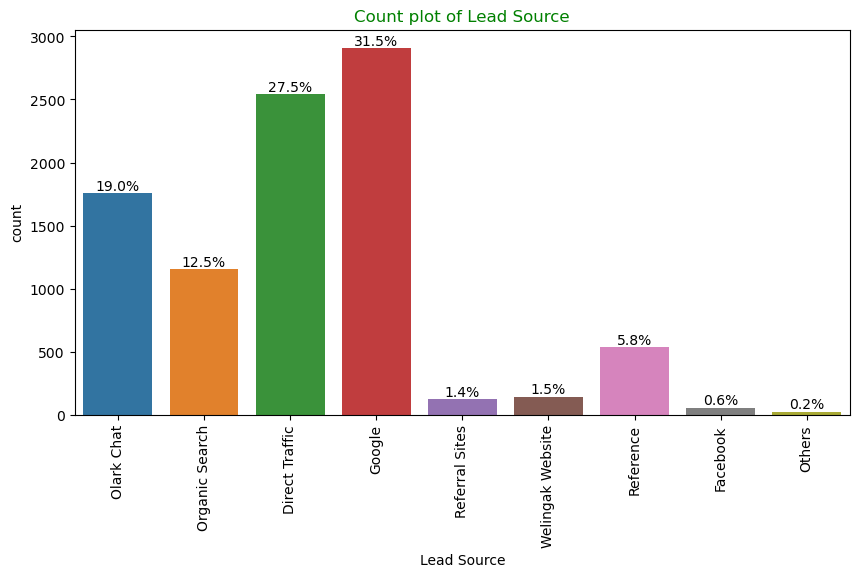

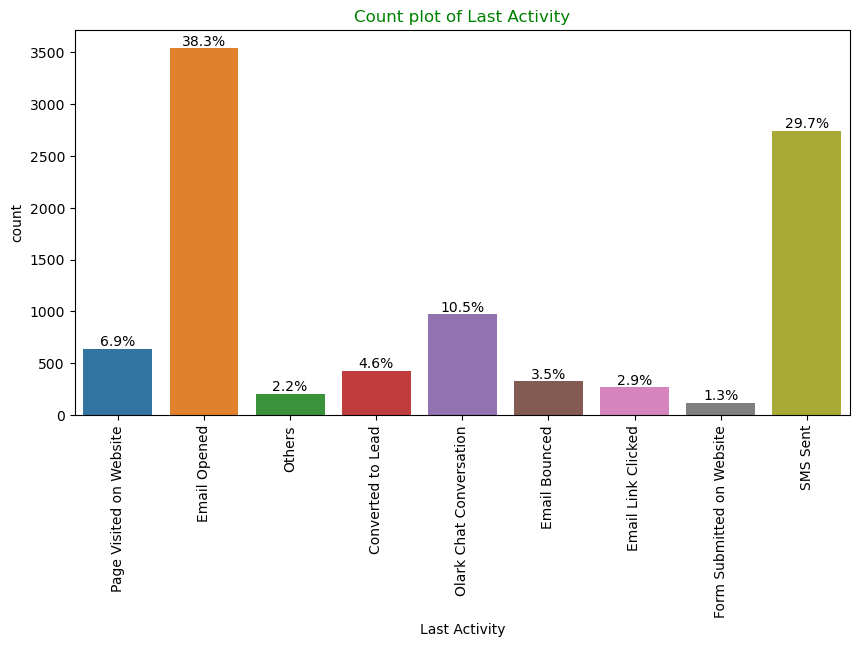

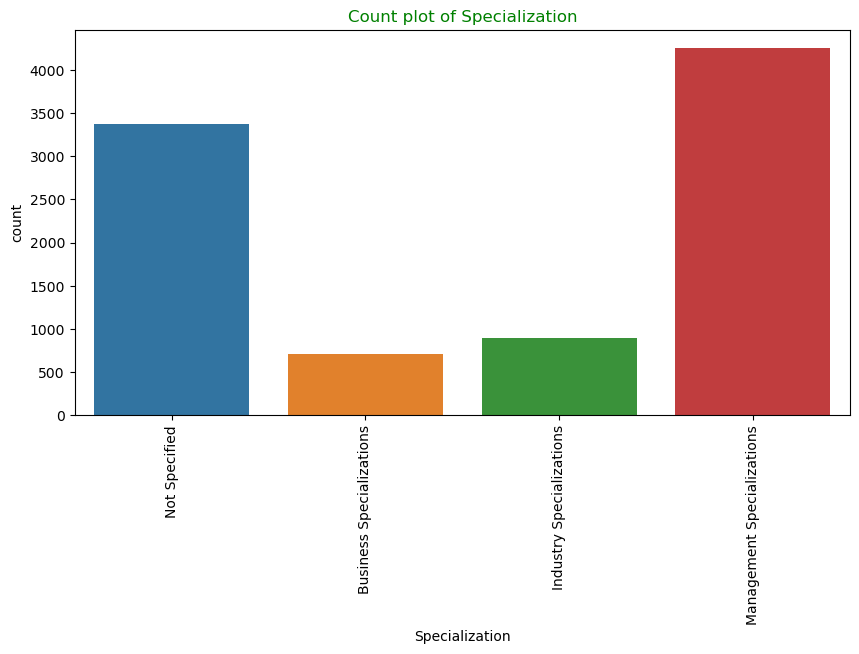

In [65]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=lead_df)
    total=len(lead_df[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

#### Insights Univariate:
- List of features from variables which are present in majority (Converted and Not Converted included)

    - Lead Origin: "Landing Page Submission" identified 53% customers, "API" identified 39%.
    - Current_occupation: It has 90% of the customers as Unemployed
    - Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.
    - Lead Source: 58% Lead source is from Google & Direct Traffic combined
    - Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities



### 4.3 Bivariate Analysis

<strong><span style="color:BLack">4.3.1 Bivariate Analysis for Categorical Variables </span></strong>

In [66]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=lead_df,palette="prism_r",alpha=0.46)
    
    total=len(lead_df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


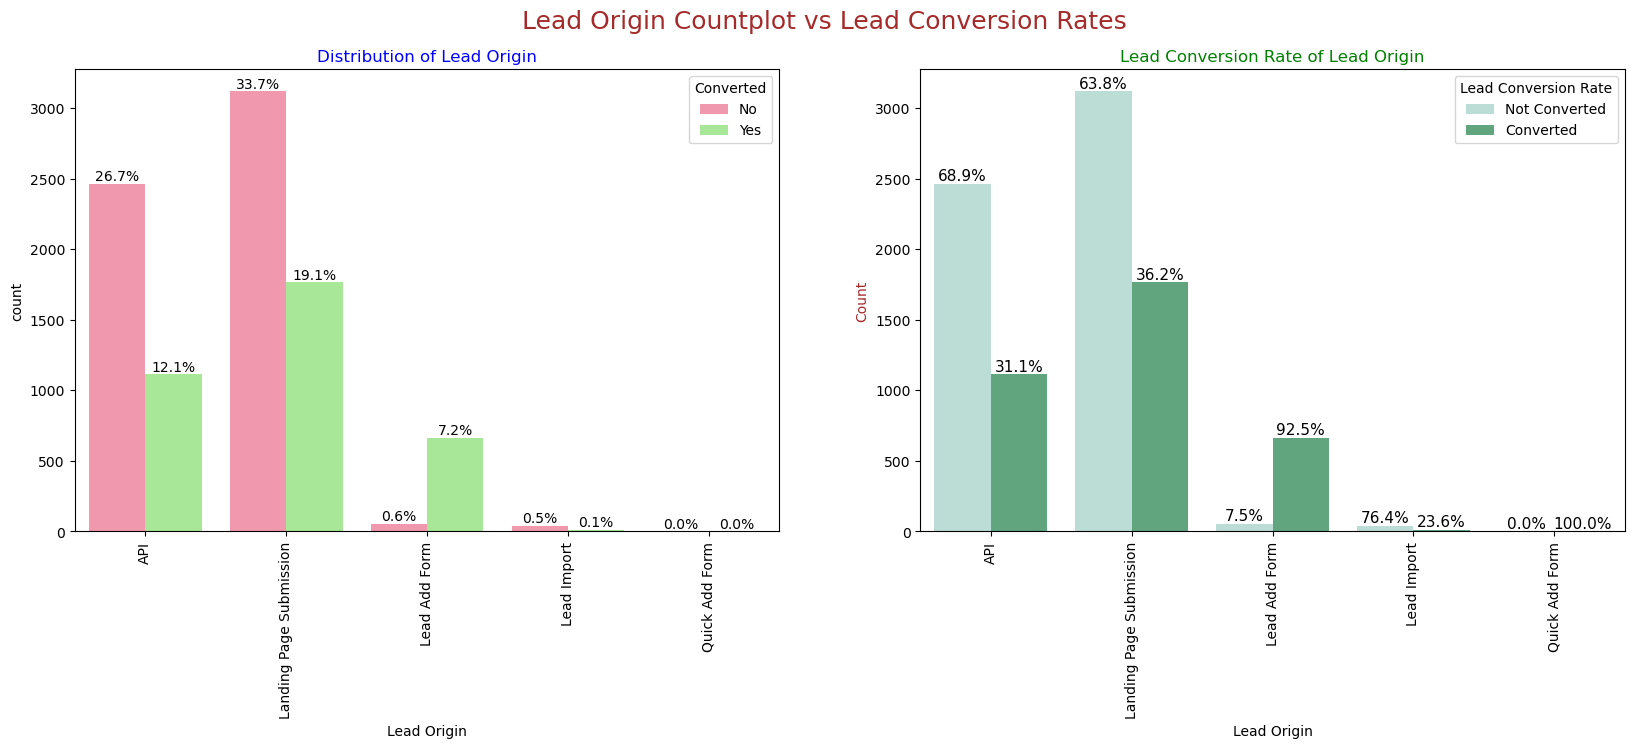

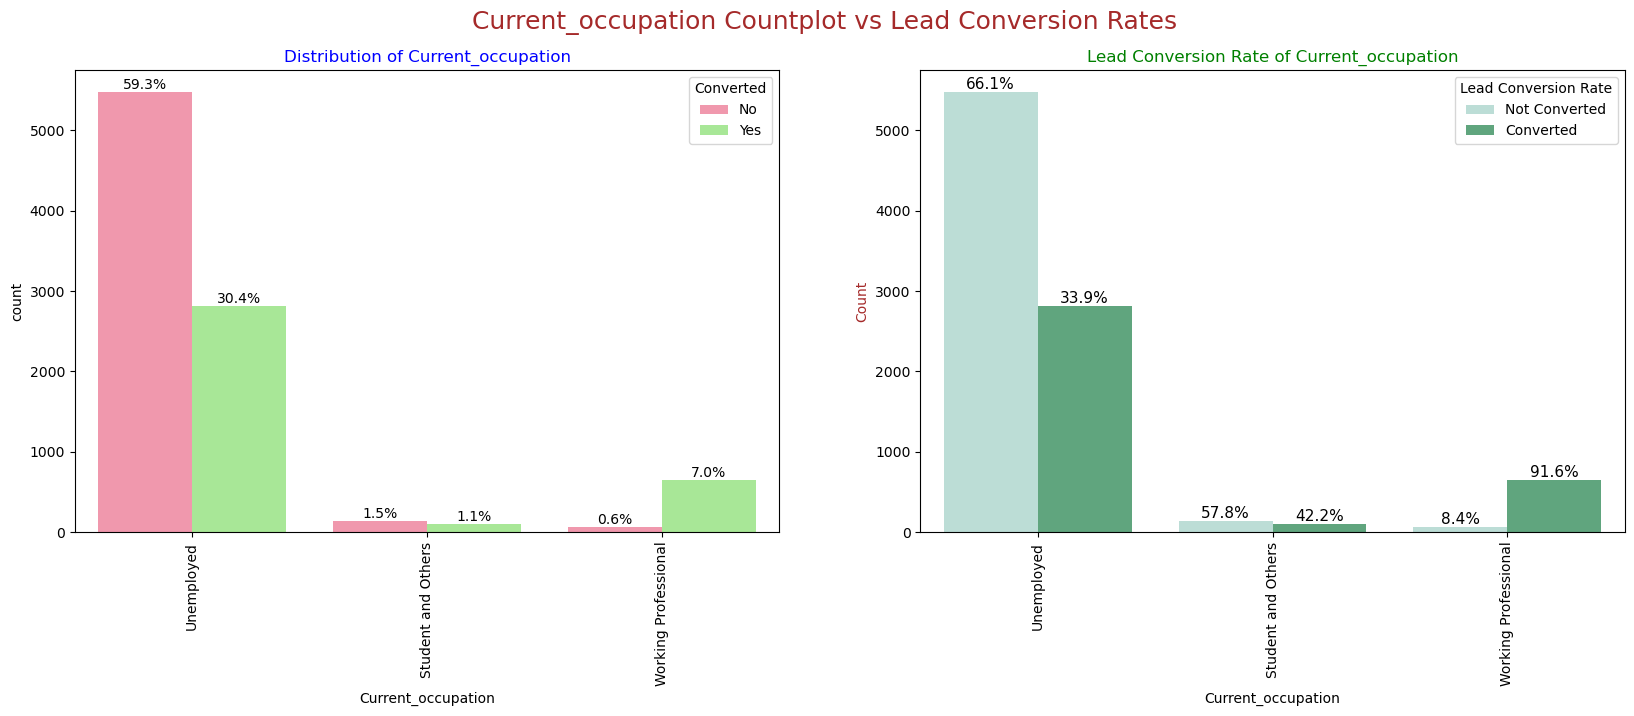

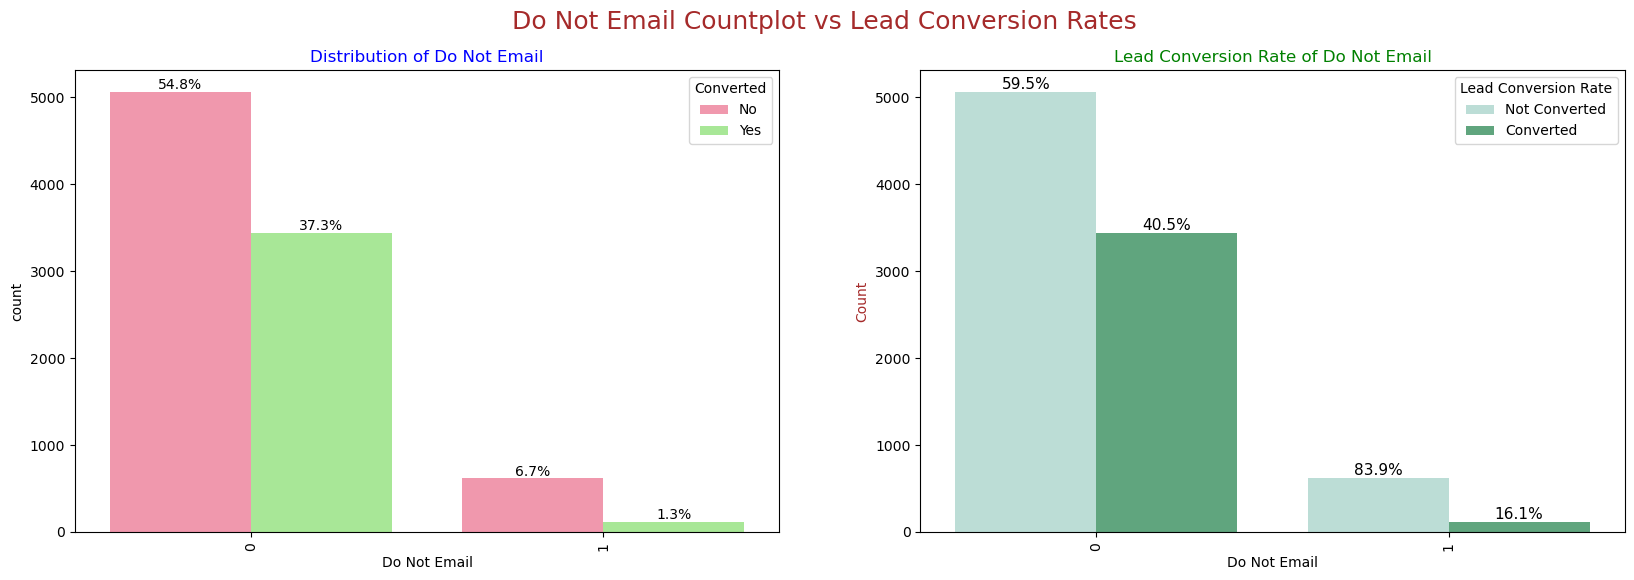

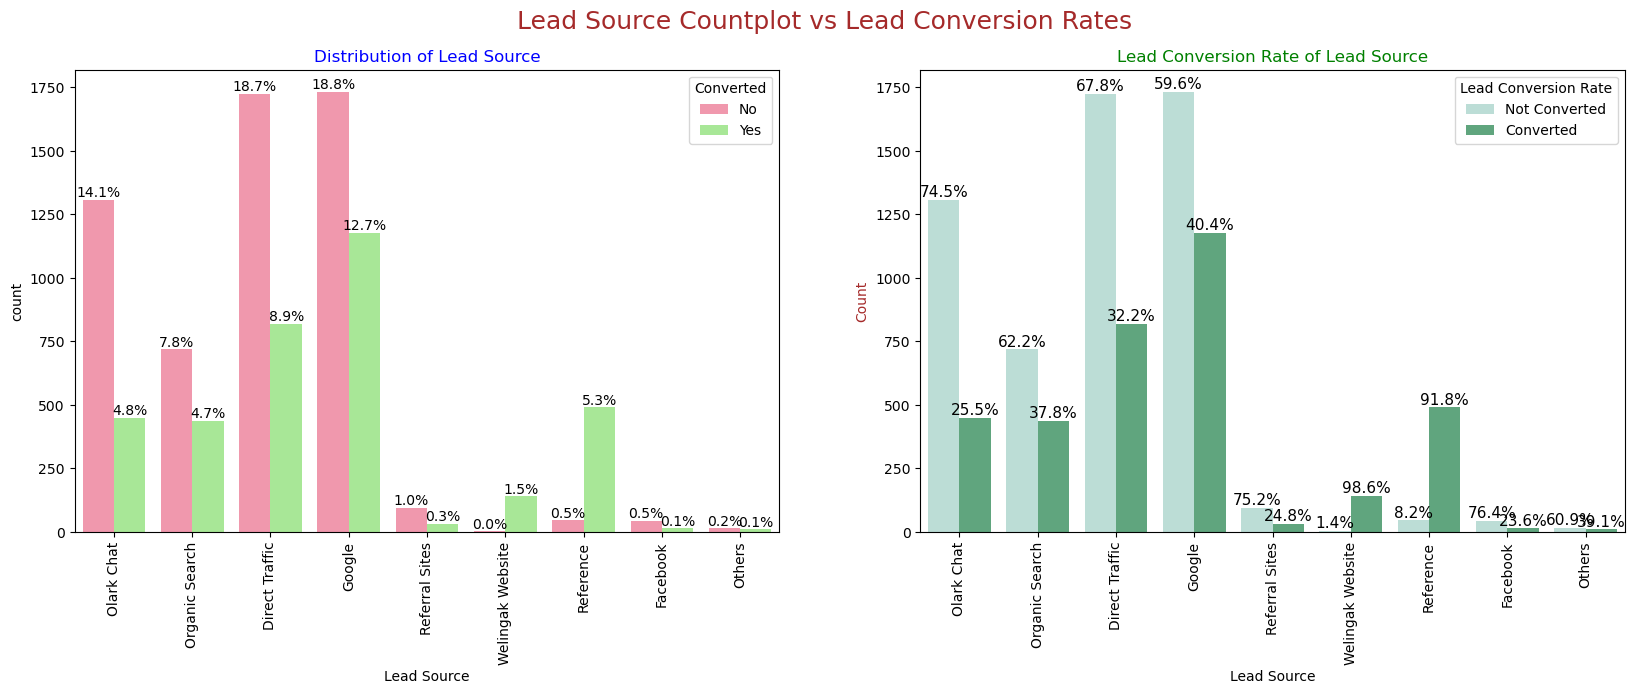

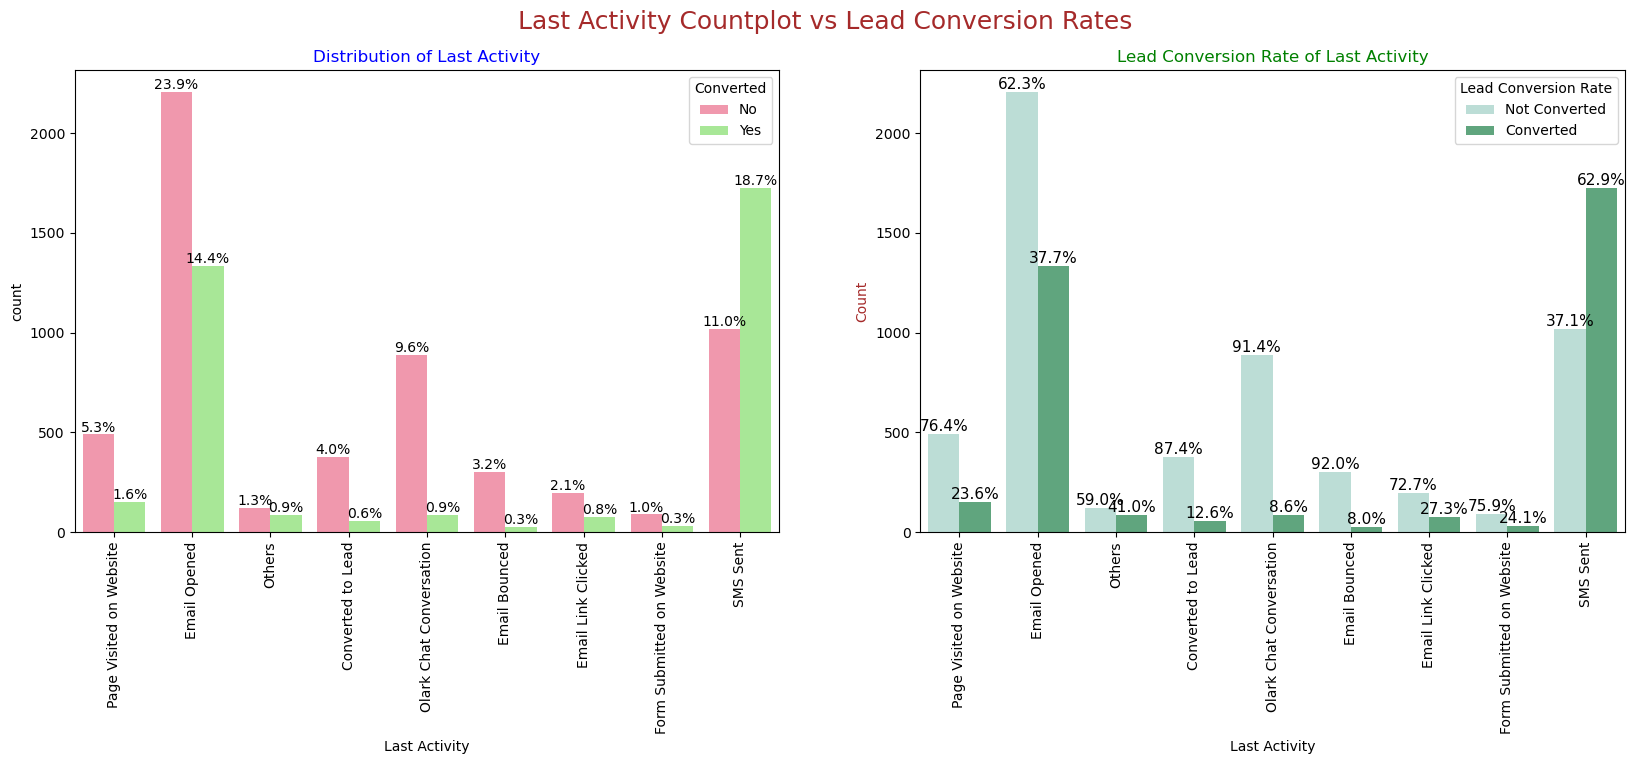

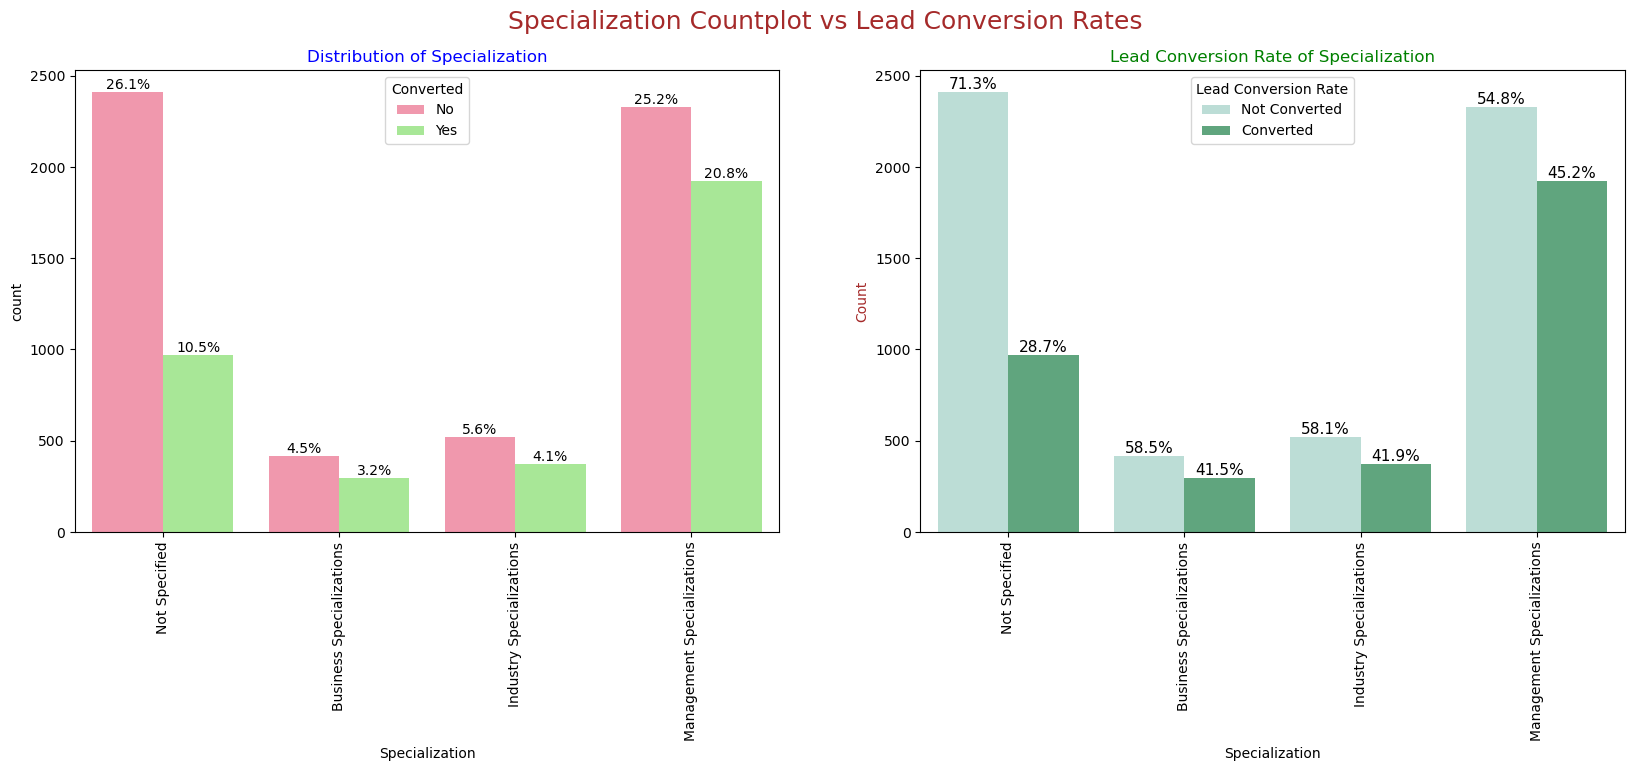

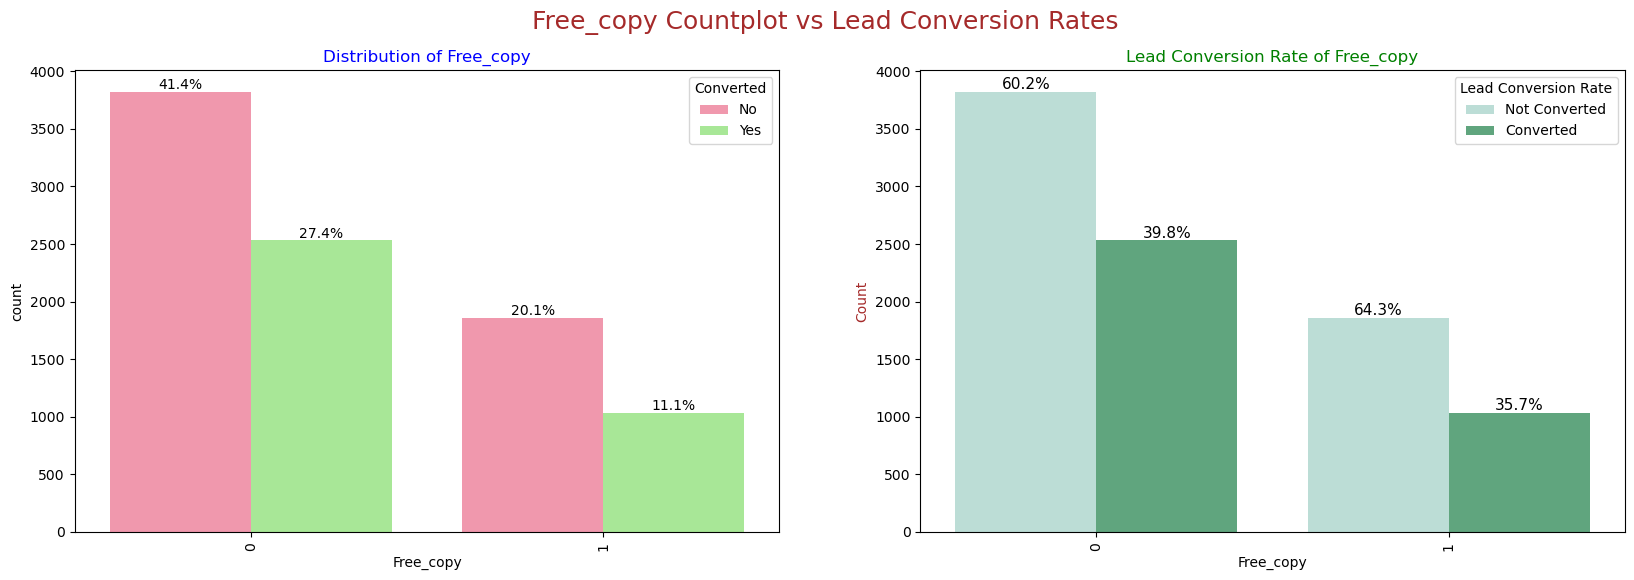

In [67]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(lead_df,variable_name=i)
    

#### Insights:

<strong><span style="color:BLack">Lead Origin:</span></strong> Around 52% of all leads originated from "Landing Page Submission" with a lead conversion rate (LCR) of 36%.The "API" identified approximately 39% of customers with a lead conversion rate (LCR) of 31%.

<strong><span style="color:BLack">Current_occupation:</span></strong> Around 90% of the customers are Unemployed with lead conversion rate (LCR) of 34%. While Working Professional contribute only 7.6% of total customers with almost 92% lead conversion rate (LCR).

<strong><span style="color:BLack">Do Not Email:</span></strong> 92% of the people has opted that they dont want to be emailed about the course.

<strong><span style="color:BLack">Lead Source:</span></strong> Google has LCR of 40% out of 31% customers , Direct Traffic contributes 32% LCR with 27% customers which is lower than Google,Organic Search also gives 37.8% of LCR but the contribution is by only 12.5% of customers ,Reference has LCR of 91% but there are only around 6% of customers through this Lead Source.

<strong><span style="color:BLack">Last Activity:</span></strong> 'SMS Sent' has high lead conversion rate of 63% with 30% contribution from last activities, 'Email Opened' activity contributed 38% of last activities performed by the customers with 37% lead conversion rate.

<strong><span style="color:BLack">Specialization:</span></strong> Management Specialization shows good contribution.

<strong><span style="color:BLack">4.3.2 Bivariate Analysis for Numerical Variables </span></strong>

<Figure size 1600x400 with 0 Axes>

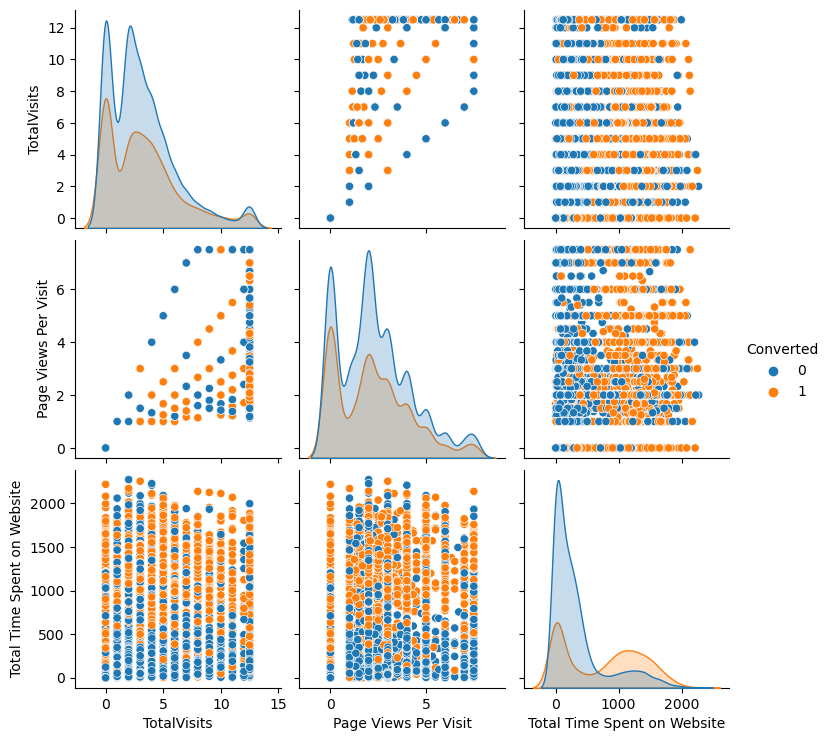

In [68]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=lead_df,vars=num_cols,hue="Converted")                                  
plt.show()

In [69]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

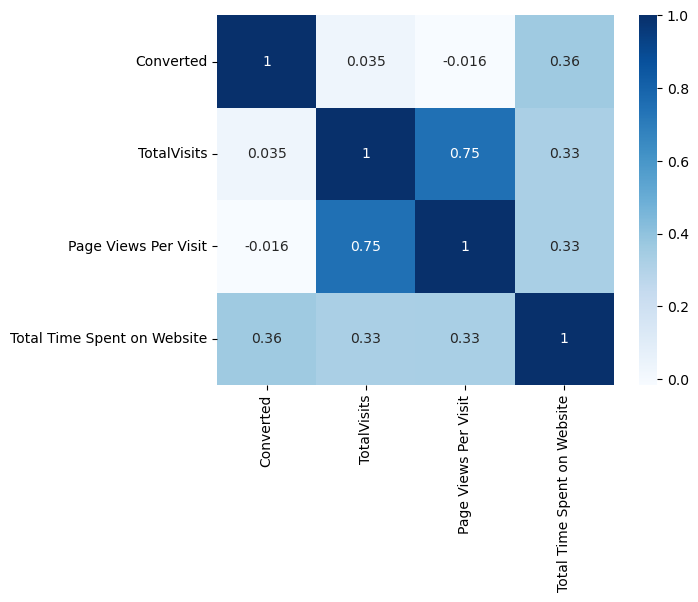

In [70]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=lead_df[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

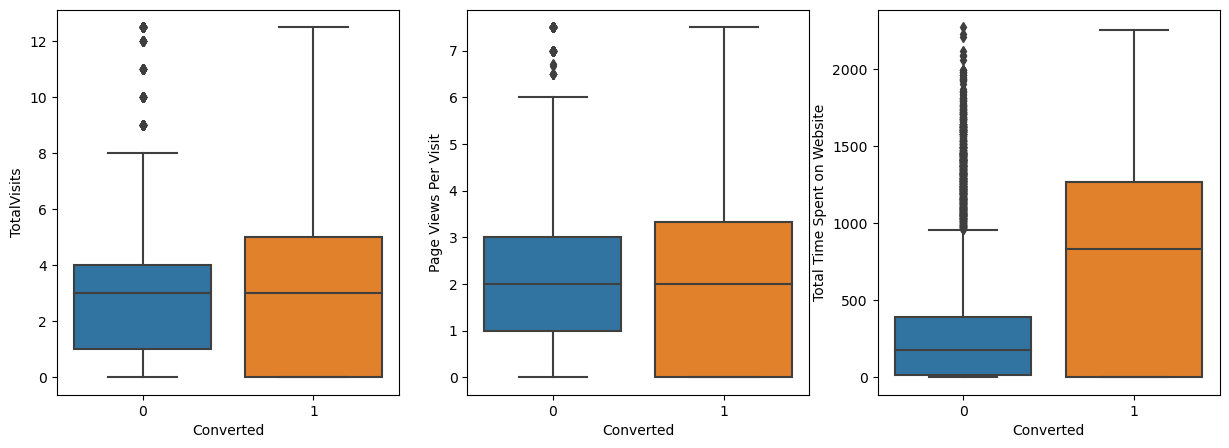

In [71]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)
plt.show()

<strong><span style="color:black">Insights:</span></strong> 
- Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

### Step 4: Data Prepration

#### 5.1 Dummy Variables
For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [72]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Specializations,Student and Others,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Industry Specializations,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0


In [73]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(lead_df[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
lead_df = pd.concat([lead_df, dummy], axis=1)

In [74]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Industry Specializations,Specialization_Management Specializations,Specialization_Not Specified,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,1,0,0,0,1,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,1,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Specializations,Student and Others,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Industry Specializations,Unemployed,...,0,0,1,0,0,1,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,0,1,1,0


In [75]:
# We have created dummies for the below variables, so we can drop them

lead_df = lead_df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)

In [76]:
lead_df.shape

(9240, 31)

In [77]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Do Not Email                               9240 non-null   int64  
 1   Converted                                  9240 non-null   int64  
 2   TotalVisits                                9240 non-null   float64
 3   Total Time Spent on Website                9240 non-null   int64  
 4   Page Views Per Visit                       9240 non-null   float64
 5   Free_copy                                  9240 non-null   int64  
 6   Lead Origin_Landing Page Submission        9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                  9240 non-null   uint8  
 8   Lead Origin_Lead Import                    9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                 9240 non-null   uint8  
 10  Lead Source_Facebook    

### Step 6: Test-Train Split

In [78]:
# Putting predictor variables to X
X = lead_df.drop('Converted', axis=1)

# Putting Target variables to y
y = lead_df["Converted"]

In [79]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [151]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [81]:
# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Industry Specializations,Specialization_Management Specializations,Specialization_Not Specified,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [82]:
# Checking the Lead Conversion Rate (LCR) 
LCR = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
LCR

38.53896103896104

Lead conversation rate is 38.5

#### 7.1 Feature elimination based on Correlation

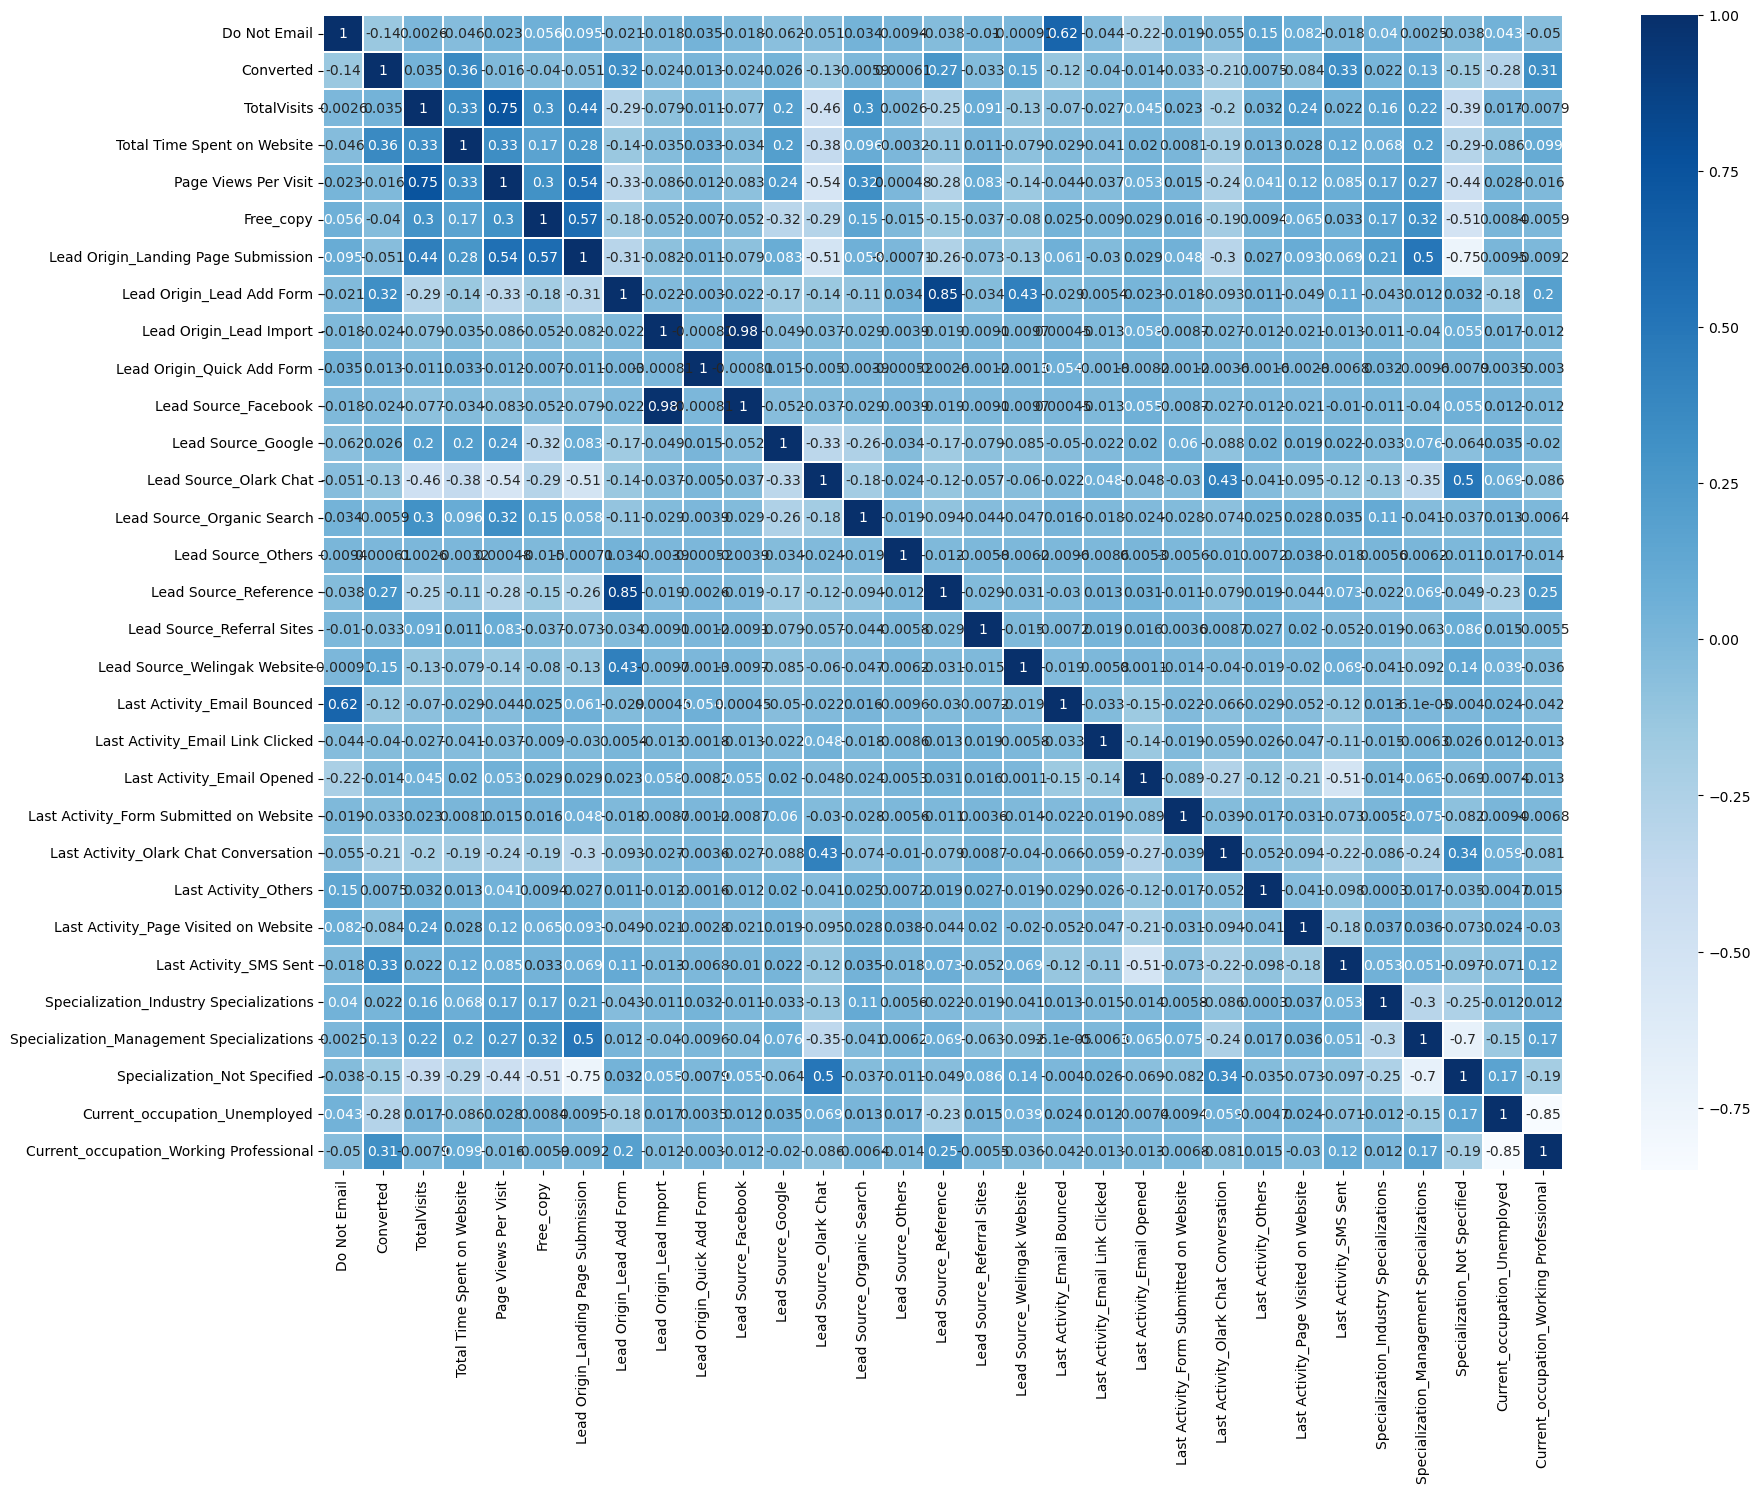

In [83]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(lead_df.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

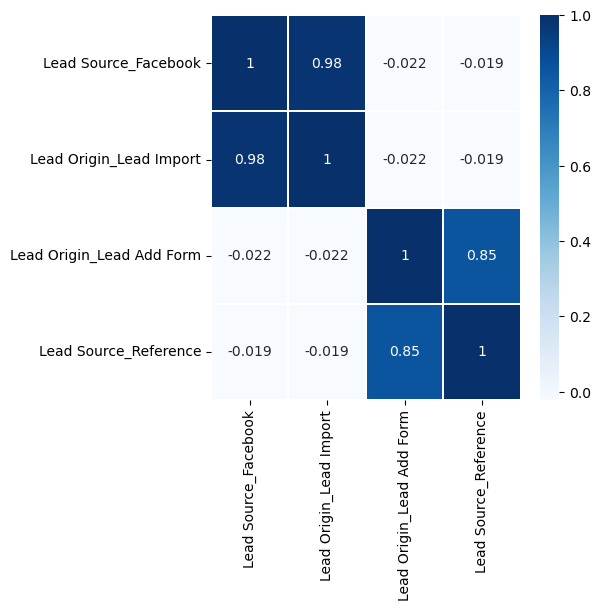

In [84]:
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))        
sns.heatmap(lead_df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

<strong><span style="color:Black"></span></strong> These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'.

In [85]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

### <strong><span style="color:black">Step 8: Model Building </span></strong>
- Build Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE (Coarse tuning)
- Manual fine-tuning using p-values and VIFs

#### 8.1 Feature Selection Using RFE (Recursive Feature Elimination)

In [86]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [87]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Free_copy', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 6),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 10),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 12),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 5),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Industry Specializations', False, 8),
 

In [88]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
27,Current_occupation_Working Professional,True,1
14,Lead Source_Welingak Website,True,1
26,Current_occupation_Unemployed,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
9,Lead Source_Olark Chat,True,1
17,Last Activity_Email Opened,True,1
20,Last Activity_Others,True,1
22,Last Activity_SMS Sent,True,1


In [89]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Not Specified',
       'Current_occupation_Unemployed',
       'Current_occupation_Working Professional'],
      dtype='object')

In [90]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Industry Specializations',
       'Specialization_Management Specializations'],
      dtype='object')

In [91]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

#### Model 1

In [92]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                     -0.573841
Total Time Spent on Website                1.045684
Lead Origin_Landing Page Submission       -1.263269
Lead Source_Facebook                      -0.751341
Lead Source_Olark Chat                     0.876584
Lead Source_Others                         1.015936
Lead Source_Reference                      2.845871
Lead Source_Welingak Website               5.344037
Last Activity_Email Link Clicked           0.472008
Last Activity_Email Opened                 1.026379
Last Activity_Olark Chat Conversation     -0.481323
Last Activity_Others                       1.333361
Last Activity_SMS Sent                     2.144656
Specialization_Not Specified              -1.172615
Current_occupation_Unemployed             -0.562633
Current_occupation_Working Professional    2.129425
dtype: float64

In [93]:
#Summary of logistic regression model 1
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.0
Date:                Sun, 15 Oct 2023   Deviance:                       5481.9
Time:                        13:51:09   Pearson chi2:                 8.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

 "Lead Source_Facebook" column will be removed from model due to high p-value of 0.158, which is above the accepted threshold of 0.05 for statistical significance.

#### Model 2

In [94]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Facebook")

In [95]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                     -0.593073
Total Time Spent on Website                1.048258
Lead Origin_Landing Page Submission       -1.243541
Lead Source_Olark Chat                     0.895935
Lead Source_Others                         1.024143
Lead Source_Reference                      2.867115
Lead Source_Welingak Website               5.363085
Last Activity_Email Link Clicked           0.471418
Last Activity_Email Opened                 1.020346
Last Activity_Olark Chat Conversation     -0.481261
Last Activity_Others                       1.333721
Last Activity_SMS Sent                     2.140668
Specialization_Not Specified              -1.168530
Current_occupation_Unemployed             -0.560285
Current_occupation_Working Professional    2.129674
dtype: float64

In [96]:
#Summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.1
Date:                Sun, 15 Oct 2023   Deviance:                       5484.2
Time:                        13:51:09   Pearson chi2:                 8.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3821
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

"Last Activity_Email Link Clicked" column will be removed from model due to high p-value of  0.048 , which is above the accepted threshold of 0.05 for statistical significance.

#### Model 3

In [97]:
# Dropping 'Last Activity_Email Link Clicked' column
rfe_col=rfe_col.drop("Last Activity_Email Link Clicked")

In [98]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                     -0.524450
Total Time Spent on Website                1.046079
Lead Origin_Landing Page Submission       -1.243179
Lead Source_Olark Chat                     0.908362
Lead Source_Others                         1.010519
Lead Source_Reference                      2.884718
Lead Source_Welingak Website               5.401123
Last Activity_Email Opened                 0.943089
Last Activity_Olark Chat Conversation     -0.565373
Last Activity_Others                       1.257902
Last Activity_SMS Sent                     2.063694
Specialization_Not Specified              -1.166344
Current_occupation_Unemployed             -0.554996
Current_occupation_Working Professional    2.133179
dtype: float64

In [99]:
#Let's see the summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.0
Date:                Sun, 15 Oct 2023   Deviance:                       5487.9
Time:                        13:51:09   Pearson chi2:                 8.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3818
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

"Lead Source_Others" column will be removed from model due to high p-value of  0.048 , which is above the accepted threshold of 0.05 for statistical significance.

#### model 4

In [100]:
# Dropping 'Lead Source_Others' column
rfe_col=rfe_col.drop("Lead Source_Others")

In [101]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                     -0.511608
Total Time Spent on Website                1.043950
Lead Origin_Landing Page Submission       -1.253002
Lead Source_Olark Chat                     0.898359
Lead Source_Reference                      2.872624
Lead Source_Welingak Website               5.392725
Last Activity_Email Opened                 0.941737
Last Activity_Olark Chat Conversation     -0.562633
Last Activity_Others                       1.262282
Last Activity_SMS Sent                     2.059807
Specialization_Not Specified              -1.175455
Current_occupation_Unemployed             -0.550400
Current_occupation_Working Professional    2.131416
dtype: float64

In [102]:
#Summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.8
Date:                Sun, 15 Oct 2023   Deviance:                       5491.6
Time:                        13:51:09   Pearson chi2:                 8.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3814
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

'Current_occupation_Unemployed' column will be removed from model due to high p-value of  0.010  , which is above the accepted threshold of 0.05 for statistical significance.

#### model 5

In [103]:
# Dropping 'Current_occupation_Unemployed' column
rfe_col=rfe_col.drop("Current_occupation_Unemployed")

In [104]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm5 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm5 = sm.GLM(y_train,X_train_sm5,family = sm.families.Binomial()).fit()  

logm5.params

const                                     -1.045979
Total Time Spent on Website                1.044035
Lead Origin_Landing Page Submission       -1.252652
Lead Source_Olark Chat                     0.904821
Lead Source_Reference                      2.890719
Lead Source_Welingak Website               5.383504
Last Activity_Email Opened                 0.944301
Last Activity_Olark Chat Conversation     -0.556343
Last Activity_Others                       1.253032
Last Activity_SMS Sent                     2.050338
Specialization_Not Specified              -1.180145
Current_occupation_Working Professional    2.666138
dtype: float64

In [105]:
#Summary of our logistic regression model
print(logm5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2749.0
Date:                Sun, 15 Oct 2023   Deviance:                       5498.1
Time:                        13:51:09   Pearson chi2:                 8.05e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3808
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Model 5 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [106]:
# Now checking VIFs for all variables in the Model 5 
get_vif(X_train_rfe)

,Features,VIF
0,Specialization_Not Specified,2.47
1,Lead Origin_Landing Page Submission,2.44
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,Current_occupation_Working Professional,1.21
9,Lead Source_Welingak Website,1.08


No variable needs to be dropped as they all have good VIF values less than 5.

p-values for all variables is less than 0.05
This model looks acceptable as everything is under control (p-values & VIFs).
So we will final our Model 5 for Model Evaluation.

### Step 9: Model Evaluation

- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall


In [107]:
# Getting the predicted values on the train set
y_train_pred = logm5.predict(X_train_sm5)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.469733
6795    0.073884
3516    0.249952
8105    0.764416
3934    0.213936
4844    0.987418
3297    0.107521
8071    0.995893
987     0.168882
7423    0.868263
dtype: float64

In [108]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.46973311, 0.07388374, 0.24995238, 0.76441576, 0.21393616,
       0.98741754, 0.1075215 , 0.9958931 , 0.16888218, 0.86826311])

In [109]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.469733,1871
1,0,0.073884,6795
2,0,0.249952,3516
3,0,0.764416,8105
4,0,0.213936,3934


Found the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [110]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.469733,1871,0
1,0,0.073884,6795,0
2,0,0.249952,3516,0
3,0,0.764416,8105,1
4,0,0.213936,3934,0


#### 9.1 Confusion Matrix

In [111]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3584  418]
 [ 849 1617]]


#### 9.2 Accuracy

In [112]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8041125541125541


#### 9.3 Metrics beyond simply accuracy
- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
# Sensitivity of logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6557177615571776


In [115]:
# specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.895552223888056


In [116]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10444777611194403


In [117]:
# positive predictive value 
print (TP / float(TP+FP))

0.7945945945945946


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8084818407399053


#### 9.4 Plotting the ROC Curve

In [119]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

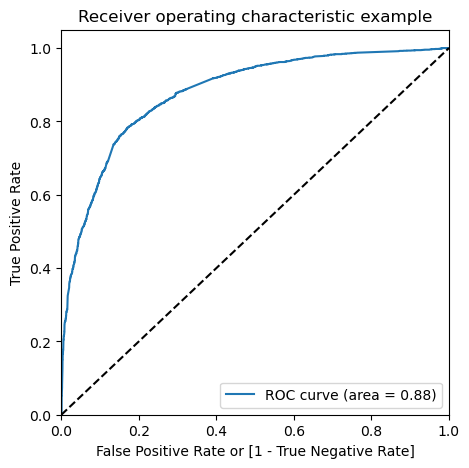

In [121]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

#### 9.4.1 Finding Optimal Cutoff Point/ Probability

In [122]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.469733,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073884,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249952,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.764416,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.213936,3934,0,1,1,1,0,0,0,0,0,0,0


In [123]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.594156  0.973642  0.360320
0.2   0.2  0.720315  0.919708  0.597451
0.3   0.3  0.791126  0.832522  0.765617
0.4   0.4  0.814162  0.762774  0.845827
0.5   0.5  0.804113  0.655718  0.895552
0.6   0.6  0.792053  0.585158  0.919540
0.7   0.7  0.778912  0.508110  0.945777
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707638  0.246553  0.991754


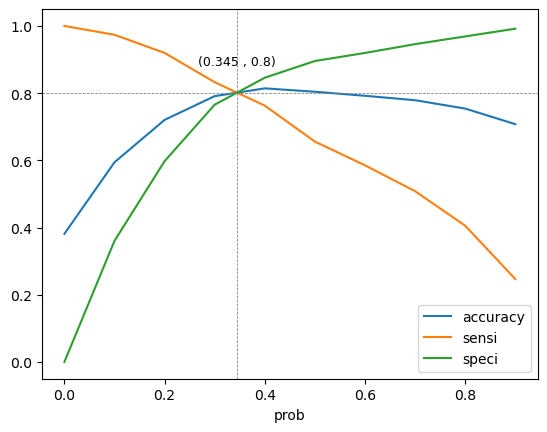

In [124]:
# Plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


0.345 is the approx. point where all the curves meet, so 0.345 seems to be the Optimal cutoff point for probability threshold .

Mapping again using optimal cutoff point

In [125]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.469733,1871,1
1,0,0.073884,6795,0
2,0,0.249952,3516,0
3,0,0.764416,8105,1
4,0,0.213936,3934,0


### 9.5 Calculating all metrics using confusion matrix for Train

In [126]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.8045763760049475


In [127]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [128]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3232  770]
 [ 494 1972]] 

************************************************** 

True Negative                    :  3232
True Positive                    :  1972
False Negative                   :  494
False Positve                    :  770
Model Accuracy                   :  0.8046
Model Sensitivity                :  0.7997
Model Specificity                :  0.8076
Model Precision                  :  0.7192
Model Recall                     :  0.7997
Model True Positive Rate (TPR)   :  0.7997
Model False Positive Rate (FPR)  :  0.1924


************************************************** 



    For Train set
    Accuracy : 80.46%
    Sensitivity : 79.97% ≈ 80%
    Specificity : 80.76%

### 9.6 Precision and recall tradeoff

In [129]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

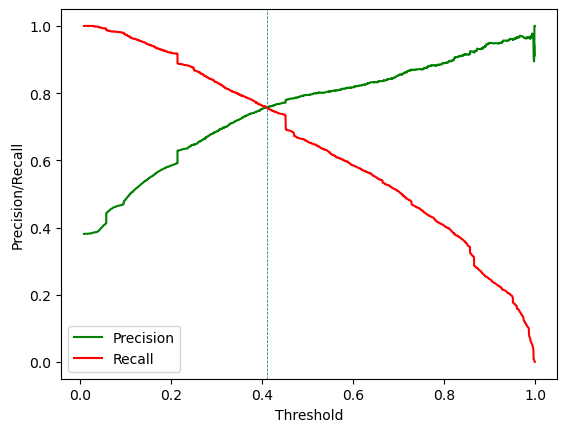

In [130]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [131]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [132]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.469733,1871,1,1
1,0,0.073884,6795,0,0
2,0,0.249952,3516,0,0
3,0,0.764416,8105,1,1
4,0,0.213936,3934,0,0


In [133]:
# all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[3404  598]
 [ 600 1866]] 

************************************************** 

True Negative                    :  3404
True Positive                    :  1866
False Negative                   :  600
False Positve                    :  598
Model Accuracy                   :  0.8148
Model Sensitivity                :  0.7567
Model Specificity                :  0.8506
Model Precision                  :  0.7573
Model Recall                     :  0.7567
Model True Positive Rate (TPR)   :  0.7567
Model False Positive Rate (FPR)  :  0.1494


************************************************** 



Adding Lead Score Feature to Training dataframe 

In [134]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.469733,1871,1,47
1,0,0.073884,6795,0,7
2,0,0.249952,3516,0,25
3,0,0.764416,8105,1,76
4,0,0.213936,3934,0,21


### Step 10: Making Predictions on test set

#### 10.1 Scaling Test dataset

In [135]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Do Not Email                               2772 non-null   int64  
 1   TotalVisits                                2772 non-null   float64
 2   Total Time Spent on Website                2772 non-null   int64  
 3   Page Views Per Visit                       2772 non-null   float64
 4   Free_copy                                  2772 non-null   int64  
 5   Lead Origin_Landing Page Submission        2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                 2772 non-null   uint8  
 7   Lead Source_Facebook                       2772 non-null   uint8  
 8   Lead Source_Google                         2772 non-null   uint8  
 9   Lead Source_Olark Chat                     2772 non-null   uint8  
 10  Lead Source_Organic S

In [136]:
# fetching numerical dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Not Specified,Current_occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0


#### 10.2 Prediction on Test Dataset using final model

In [137]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 12)

In [138]:
# making prediction using model 5 (final model)
y_test_pred = logm5.predict(X_test_sm)

In [139]:
# top 10 columns
y_test_pred[:10]

4269    0.696607
2376    0.856998
7766    0.887109
9199    0.057216
4359    0.865842
9186    0.499116
1631    0.414951
8963    0.155222
8007    0.071370
5324    0.295879
dtype: float64

In [140]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.696607
2376,0.856998
7766,0.887109
9199,0.057216
4359,0.865842


In [141]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [142]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.696607
1,1,2376,0.856998
2,1,7766,0.887109
3,0,9199,0.057216
4,1,4359,0.865842


In [143]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.696607
1,2376,1,0.856998
2,7766,1,0.887109
3,9199,0,0.057216
4,4359,1,0.865842


In [144]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.696607,1
1,2376,1,0.856998,1
2,7766,1,0.887109,1
3,9199,0,0.057216,0
4,4359,1,0.865842,1


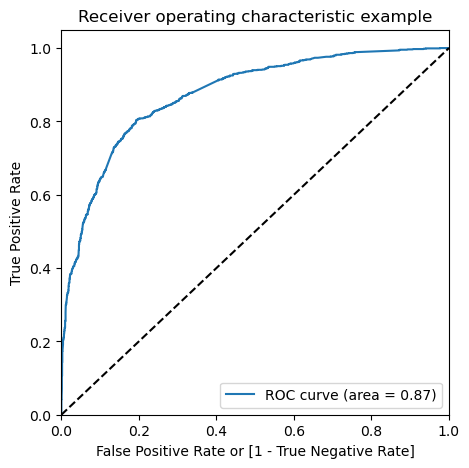

In [145]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

</span></strong> Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

#### 10.3 Test set Model Evaluation

In [146]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1355  322]
 [ 222  873]] 

************************************************** 

True Negative                    :  1355
True Positive                    :  873
False Negative                   :  222
False Positve                    :  322
Model Accuracy                   :  0.8038
Model Sensitivity                :  0.7973
Model Specificity                :  0.808
Model Precision                  :  0.7305
Model Recall                     :  0.7973
Model True Positive Rate (TPR)   :  0.7973
Model False Positive Rate (FPR)  :  0.192


************************************************** 



The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

    For Test set
    Accuracy : 80.38%
    Sensitivity : 79.73% ≈ 80%
    Specificity : 80.8%
These matrics are very close to train set, so the final model logm5 is performing with good consistency on both Train & Test set

In [147]:
# features and their coefficicent from final model
parameters=logm5.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.383504
Lead Source_Reference                      2.890719
Current_occupation_Working Professional    2.666138
Last Activity_SMS Sent                     2.050338
Last Activity_Others                       1.253032
Total Time Spent on Website                1.044035
Last Activity_Email Opened                 0.944301
Lead Source_Olark Chat                     0.904821
Last Activity_Olark Chat Conversation     -0.556343
const                                     -1.045979
Specialization_Not Specified              -1.180145
Lead Origin_Landing Page Submission       -1.252652
dtype: float64

Adding Lead Score Feature to Test dataframe 

In [148]:
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.696607,1,70
1,2376,1,0.856998,1,86
2,7766,1,0.887109,1,89
3,9199,0,0.057216,0,6
4,4359,1,0.865842,1,87


<strong><span style="color:Black">Lead Score: </span></strong> Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance 
- The customers with a lower lead score have a lower conversion chance.

# <strong><span style="color:black">Conclusion </span></strong> 

## Train - Test
### <strong><span style="color:purple">Train Data Set:</span></strong>            

- <strong><span style="color:Green">Accuracy:</span></strong> 80.46%

- <strong><span style="color:Green">Sensitivity:</span></strong> 79.97% ~ 80%

- <strong><span style="color:Green">Specificity:</span></strong> 80.76%

### <strong><span style="color:purple">Test Data Set:</span></strong> 

- <strong><span style="color:Green">Accuracy:</span></strong> 80.38%

- <strong><span style="color:Green">Sensitivity:</span></strong> 79.73% ≈ 80%

- <strong><span style="color:Green">Specificity:</span></strong> 80.8%
 

</span></strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- The model achieved a `sensitivity of 79.97%` in the train set and 79.73% in the test set, using a cut-off value of 0.345.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- `The CEO of X Education had set a target sensitivity of around 80%.`
- The model also achieved an accuracy of 80.46%, which is in line with the study's objectives.
<hr/>



## Model parameters
- The final Logistic Regression Model has 12 features

### <strong><span style="color:purple">`Top 3 features` that contributing `positively` to predicting hot leads in the model are:</span></strong> 
- <strong><span style="color:Green">Lead Source_Welingak Website</span></strong>

- <strong><span style="color:Green">Lead Source_Reference</span></strong> 

- <strong><span style="color:Green">Current_occupation_Working Professional</span></strong> 

# <strong><span style="color:black">Recommendations </span></strong> 

### <strong><span style="color:purple">To increase our Lead Conversion Rates: </span></strong>  

- Focus on features with positive coefficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Engage working professionals with tailored messaging.
- Optimize communication channels based on lead engagement impact.
- More budget / spend can be done on Welingak Website in terms of advertising, etc.
- Incentives / discounts for providing reference that convert to lead, encourage providing more references.
- Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too. 


### <strong><span style="color:purple">To identify areas of improvement: </span></strong>  

- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvement.



